In [1]:
import pandas as pd
import os

# 创建月份列表（从05月到09月）
months = ['05', '06', '07', '08', '09' ,'10', '11', '12']

# 创建文件路径列表
file_paths = []
for month in months:
    filename = f"{month}-2019.csv"
    file_path = f"D:/{filename}"
    file_paths.append(file_path)
    print(f"检查文件: {file_path}")

print("\n" + "="*50)

# 检查文件是否存在
for file_path in file_paths:
    if os.path.exists(file_path):
        print(f"✓ 文件存在: {file_path}")
    else:
        print(f"✗ 文件不存在: {file_path}")

print("\n" + "="*50)

# 合并数据集
dataframes = []
success_count = 0

for file_path in file_paths:
    try:
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            dataframes.append(df)
            success_count += 1
            print(f"成功读取: {file_path} - 形状: {df.shape}")
        else:
            print(f"跳过不存在的文件: {file_path}")
    except Exception as e:
        print(f"读取文件 {file_path} 时出错: {e}")

print(f"\n成功读取 {success_count} 个文件")

if dataframes:
    # 合并所有数据框
    merged_df = pd.concat(dataframes, ignore_index=True)
    
    print("\n" + "="*50)
    print("合并后的数据集信息:")
    print("="*50)
    
    # 打印数据集前几行
    print("\n前5行数据:")
    print(merged_df.head())
    
    # 打印数据集格式信息
    print("\n" + "="*50)
    print("数据集基本信息:")
    print("="*50)
    print(f"数据集形状: {merged_df.shape}")
    print(f"行数: {merged_df.shape[0]}")
    print(f"列数: {merged_df.shape[1]}")
    
    print("\n列名:")
    print(merged_df.columns.tolist())
    
    print("\n数据类型:")
    print(merged_df.dtypes)
    
    print("\n数据集信息摘要:")
    print(merged_df.info())
    
    # 检查是否有数值列，有则显示描述性统计
    numeric_columns = merged_df.select_dtypes(include=['number']).columns
    if len(numeric_columns) > 0:
        print("\n描述性统计:")
        print(merged_df.describe())
    else:
        print("\n没有数值列可供描述性统计")
    
else:
    print("没有成功读取任何文件，请检查文件路径和文件名")

检查文件: D:/05-2019.csv
检查文件: D:/06-2019.csv
检查文件: D:/07-2019.csv
检查文件: D:/08-2019.csv
检查文件: D:/09-2019.csv
检查文件: D:/10-2019.csv
检查文件: D:/11-2019.csv
检查文件: D:/12-2019.csv

✓ 文件存在: D:/05-2019.csv
✓ 文件存在: D:/06-2019.csv
✓ 文件存在: D:/07-2019.csv
✓ 文件存在: D:/08-2019.csv
✓ 文件存在: D:/09-2019.csv
✓ 文件存在: D:/10-2019.csv
✓ 文件存在: D:/11-2019.csv
✓ 文件存在: D:/12-2019.csv

成功读取: D:/05-2019.csv - 形状: (694336, 35)
成功读取: D:/06-2019.csv - 形状: (694498, 35)
成功读取: D:/07-2019.csv - 形状: (717754, 35)
成功读取: D:/08-2019.csv - 形状: (717521, 35)
成功读取: D:/09-2019.csv - 形状: (660726, 35)
成功读取: D:/10-2019.csv - 形状: (692968, 35)
成功读取: D:/11-2019.csv - 形状: (655104, 35)
成功读取: D:/12-2019.csv - 形状: (679996, 35)

成功读取 8 个文件

合并后的数据集信息:

前5行数据:
  carrier_code  flight_number origin_airport destination_airport        date  \
0           AS            121            SEA                 ANC  2019-05-01   
1           F9            402            LAX                 DEN  2019-05-01   
2           F9            662            SFO          

**Flight Delay Distribution Heatmap**

**Delay Causes Composition Analysis**

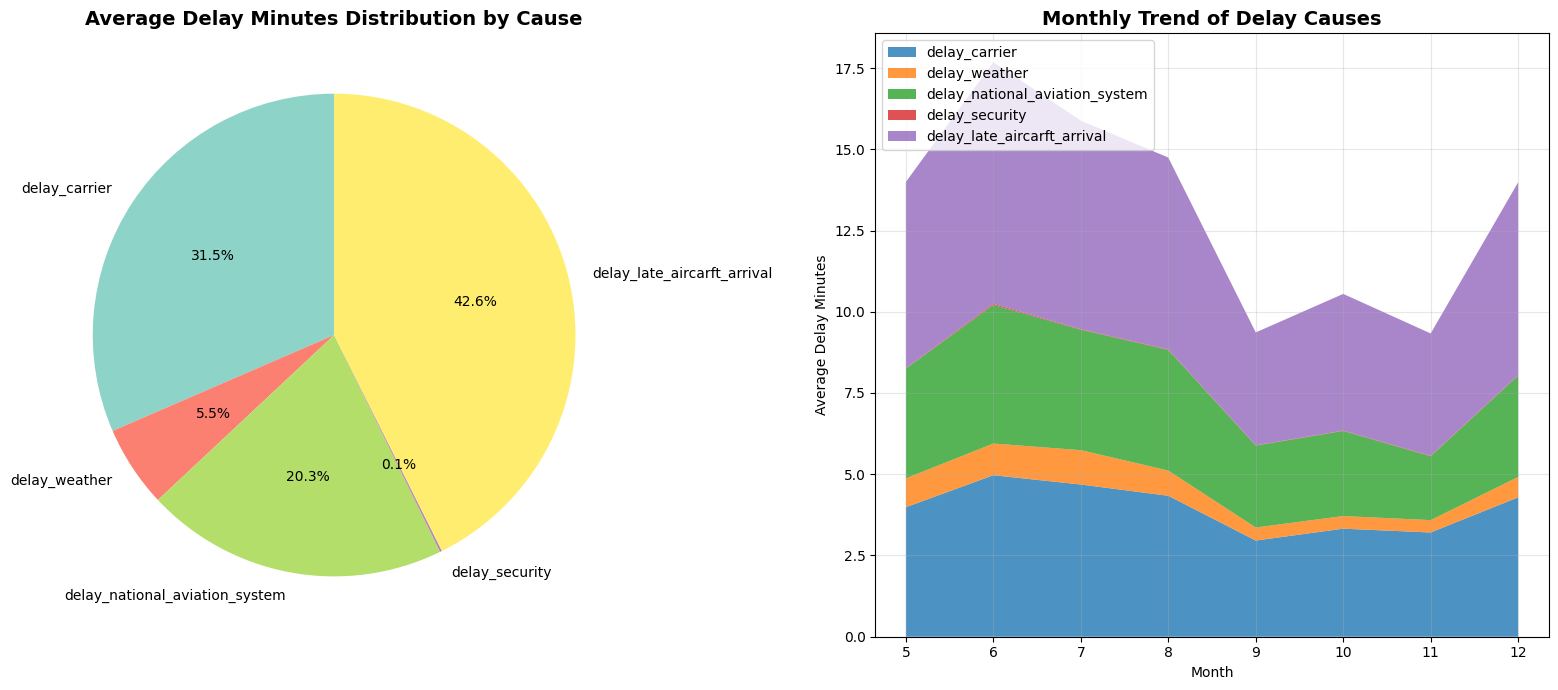

In [5]:
from matplotlib import cm

delay_columns = ['delay_carrier', 'delay_weather', 'delay_national_aviation_system', 
                'delay_security', 'delay_late_aircarft_arrival']

# Filter only delayed flights
delayed_flights = merged_df[merged_df['departure_delay'] > 0]

delay_causes_avg = delayed_flights[delay_columns].mean()
delay_causes_total = delayed_flights[delay_columns].sum()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Pie chart for average delay minutes
colors = cm.Set3(np.linspace(0, 1, len(delay_causes_avg)))
wedges, texts, autotexts = ax1.pie(delay_causes_avg, labels=delay_causes_avg.index, 
                                  autopct='%1.1f%%', colors=colors, startangle=90)
ax1.set_title('Average Delay Minutes Distribution by Cause', fontsize=14, fontweight='bold')

# Stacked area chart for monthly trend
monthly_delay_causes = merged_df.groupby('month')[delay_columns].mean()
ax2.stackplot(monthly_delay_causes.index, monthly_delay_causes.T, 
             labels=delay_columns, alpha=0.8)
ax2.set_title('Monthly Trend of Delay Causes', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Delay Minutes')
ax2.legend(loc='upper left')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Weather Impact Correlation Analysis**

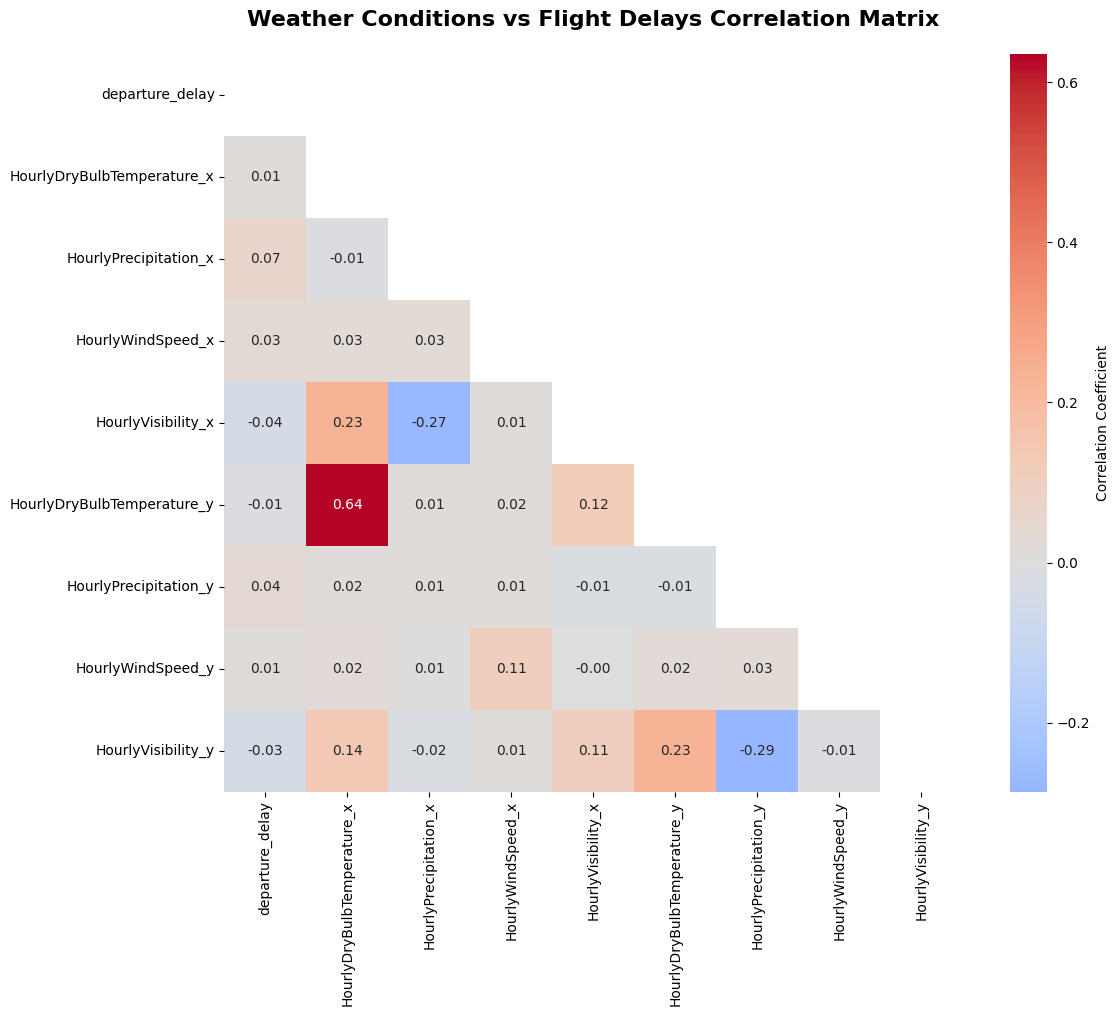

In [9]:
# Select weather and delay columns for correlation
weather_delay_columns = [
    'departure_delay', 
    'HourlyDryBulbTemperature_x', 'HourlyPrecipitation_x', 
    'HourlyWindSpeed_x', 'HourlyVisibility_x',
    'HourlyDryBulbTemperature_y', 'HourlyPrecipitation_y',
    'HourlyWindSpeed_y', 'HourlyVisibility_y'
]

correlation_matrix = merged_df[weather_delay_columns].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
           center=0, fmt='.2f', square=True,
           cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Weather Conditions vs Flight Delays Correlation Matrix', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

**Temporal Patterns - Heatmap Calendar**

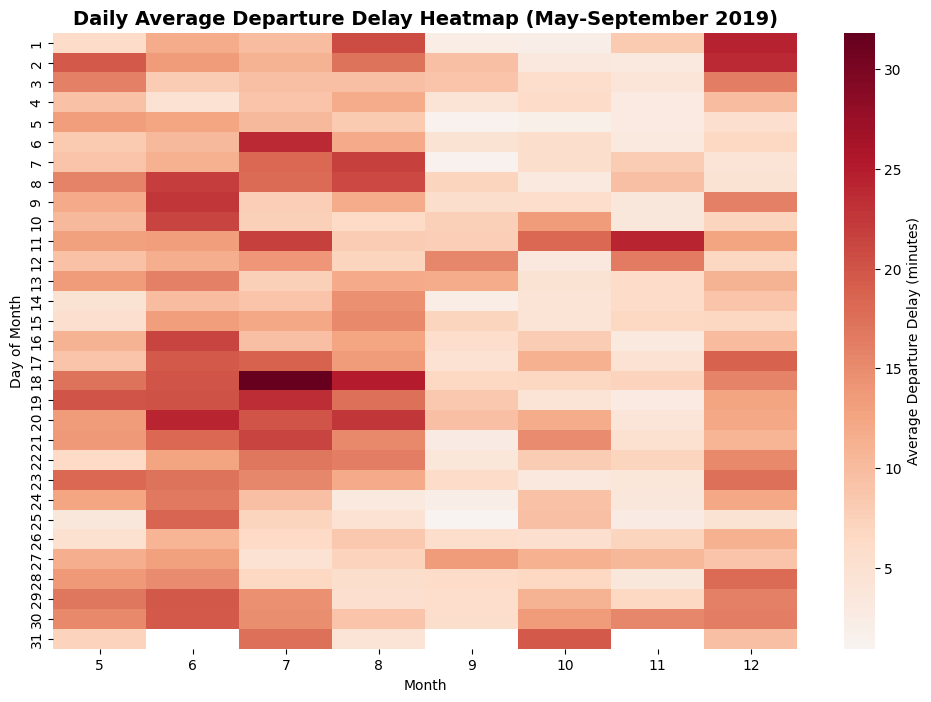

In [11]:
# Create day-month delay matrix
daily_delay = merged_df.groupby(['month', 'day']).agg({
    'departure_delay': 'mean',
    'flight_number': 'count'
}).reset_index()

# Pivot for heatmap
delay_heatmap_data = daily_delay.pivot(index='day', columns='month', values='departure_delay')

plt.figure(figsize=(12, 8))
sns.heatmap(delay_heatmap_data, cmap='RdBu_r', center=0, 
           cbar_kws={'label': 'Average Departure Delay (minutes)'})
plt.title('Daily Average Departure Delay Heatmap (May-September 2019)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Day of Month')
plt.show()

**Delay Propagation Network Analysis**

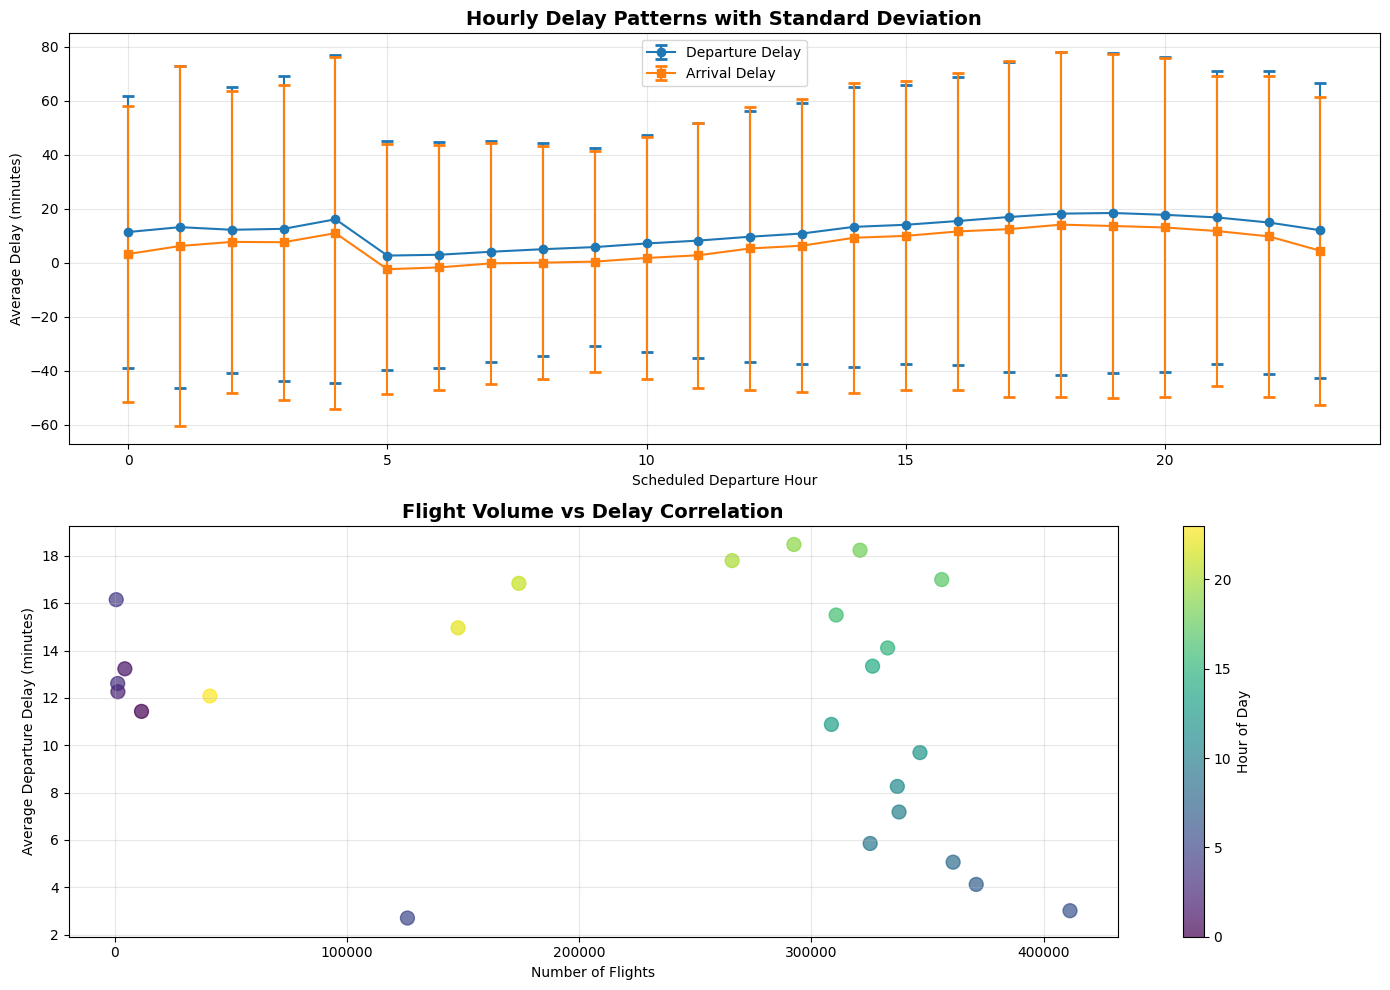

In [14]:
# Analyze how delays propagate through the day
merged_df['scheduled_departure_dt'] = pd.to_datetime(merged_df['scheduled_departure_dt'])
merged_df['scheduled_hour'] = merged_df['scheduled_departure_dt'].dt.hour

hourly_delay_propagation = merged_df.groupby('scheduled_hour').agg({
    'departure_delay': ['mean', 'std', 'count'],
    'arrival_delay': ['mean', 'std']
}).round(2)

hourly_delay_propagation.columns = ['dep_mean', 'dep_std', 'flight_count', 'arr_mean', 'arr_std']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Delay trends by hour
hours = hourly_delay_propagation.index
ax1.errorbar(hours, hourly_delay_propagation['dep_mean'], 
            yerr=hourly_delay_propagation['dep_std'], 
            label='Departure Delay', capsize=4, capthick=2, marker='o')
ax1.errorbar(hours, hourly_delay_propagation['arr_mean'], 
            yerr=hourly_delay_propagation['arr_std'],
            label='Arrival Delay', capsize=4, capthick=2, marker='s')
ax1.set_title('Hourly Delay Patterns with Standard Deviation', fontsize=14, fontweight='bold')
ax1.set_xlabel('Scheduled Departure Hour')
ax1.set_ylabel('Average Delay (minutes)')
ax1.legend()
ax1.grid(alpha=0.3)

# Flight volume vs delay correlation
ax2.scatter(hourly_delay_propagation['flight_count'], 
           hourly_delay_propagation['dep_mean'], 
           s=100, alpha=0.7, c=hours, cmap='viridis')
ax2.set_xlabel('Number of Flights')
ax2.set_ylabel('Average Departure Delay (minutes)')
ax2.set_title('Flight Volume vs Delay Correlation', fontsize=14, fontweight='bold')
cbar = plt.colorbar(ax2.collections[0], ax=ax2)
cbar.set_label('Hour of Day')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Advanced Statistical Distribution Analysis**

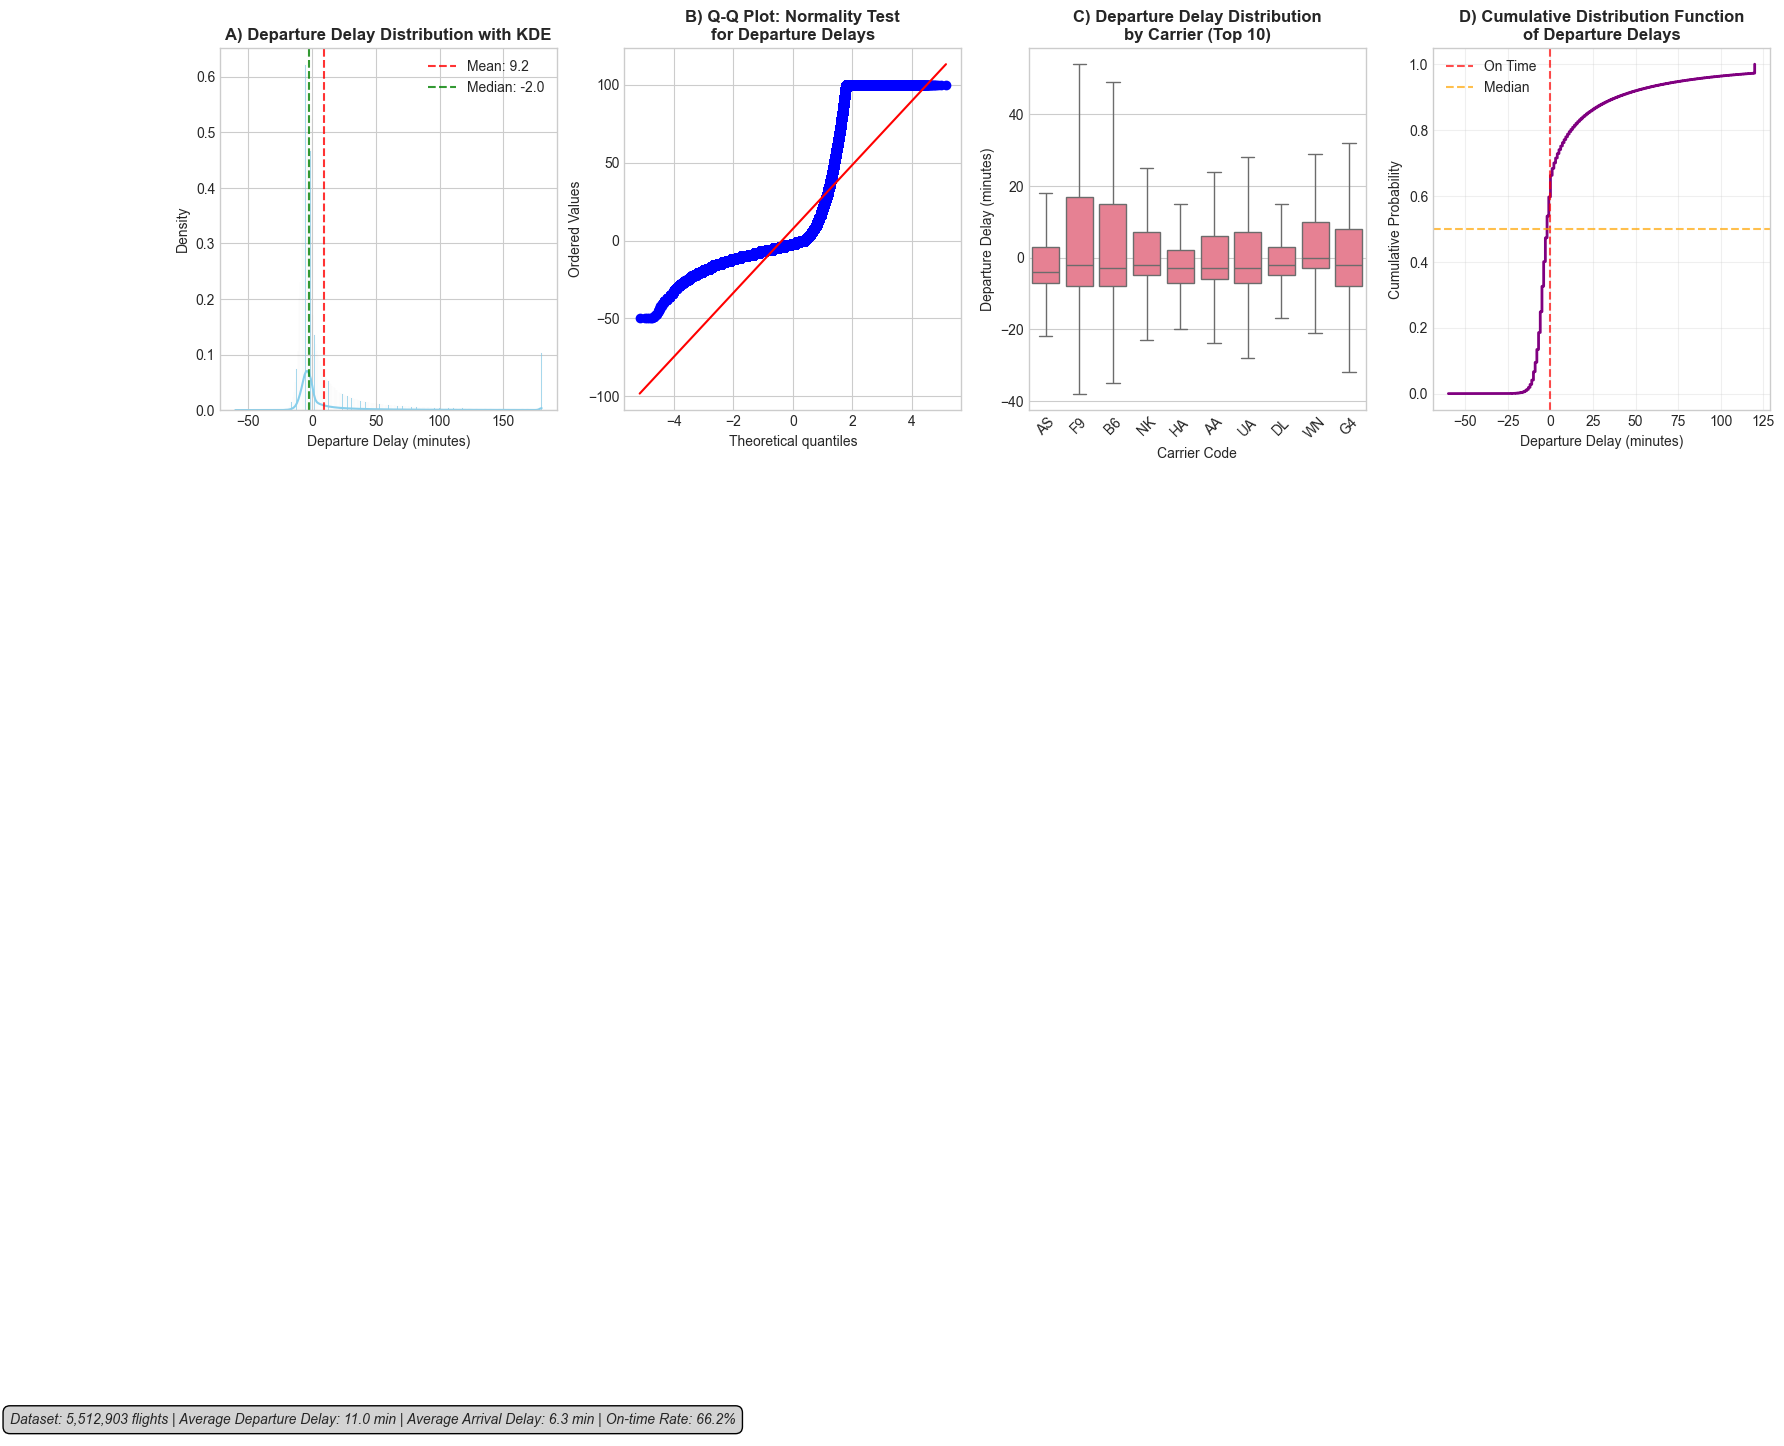

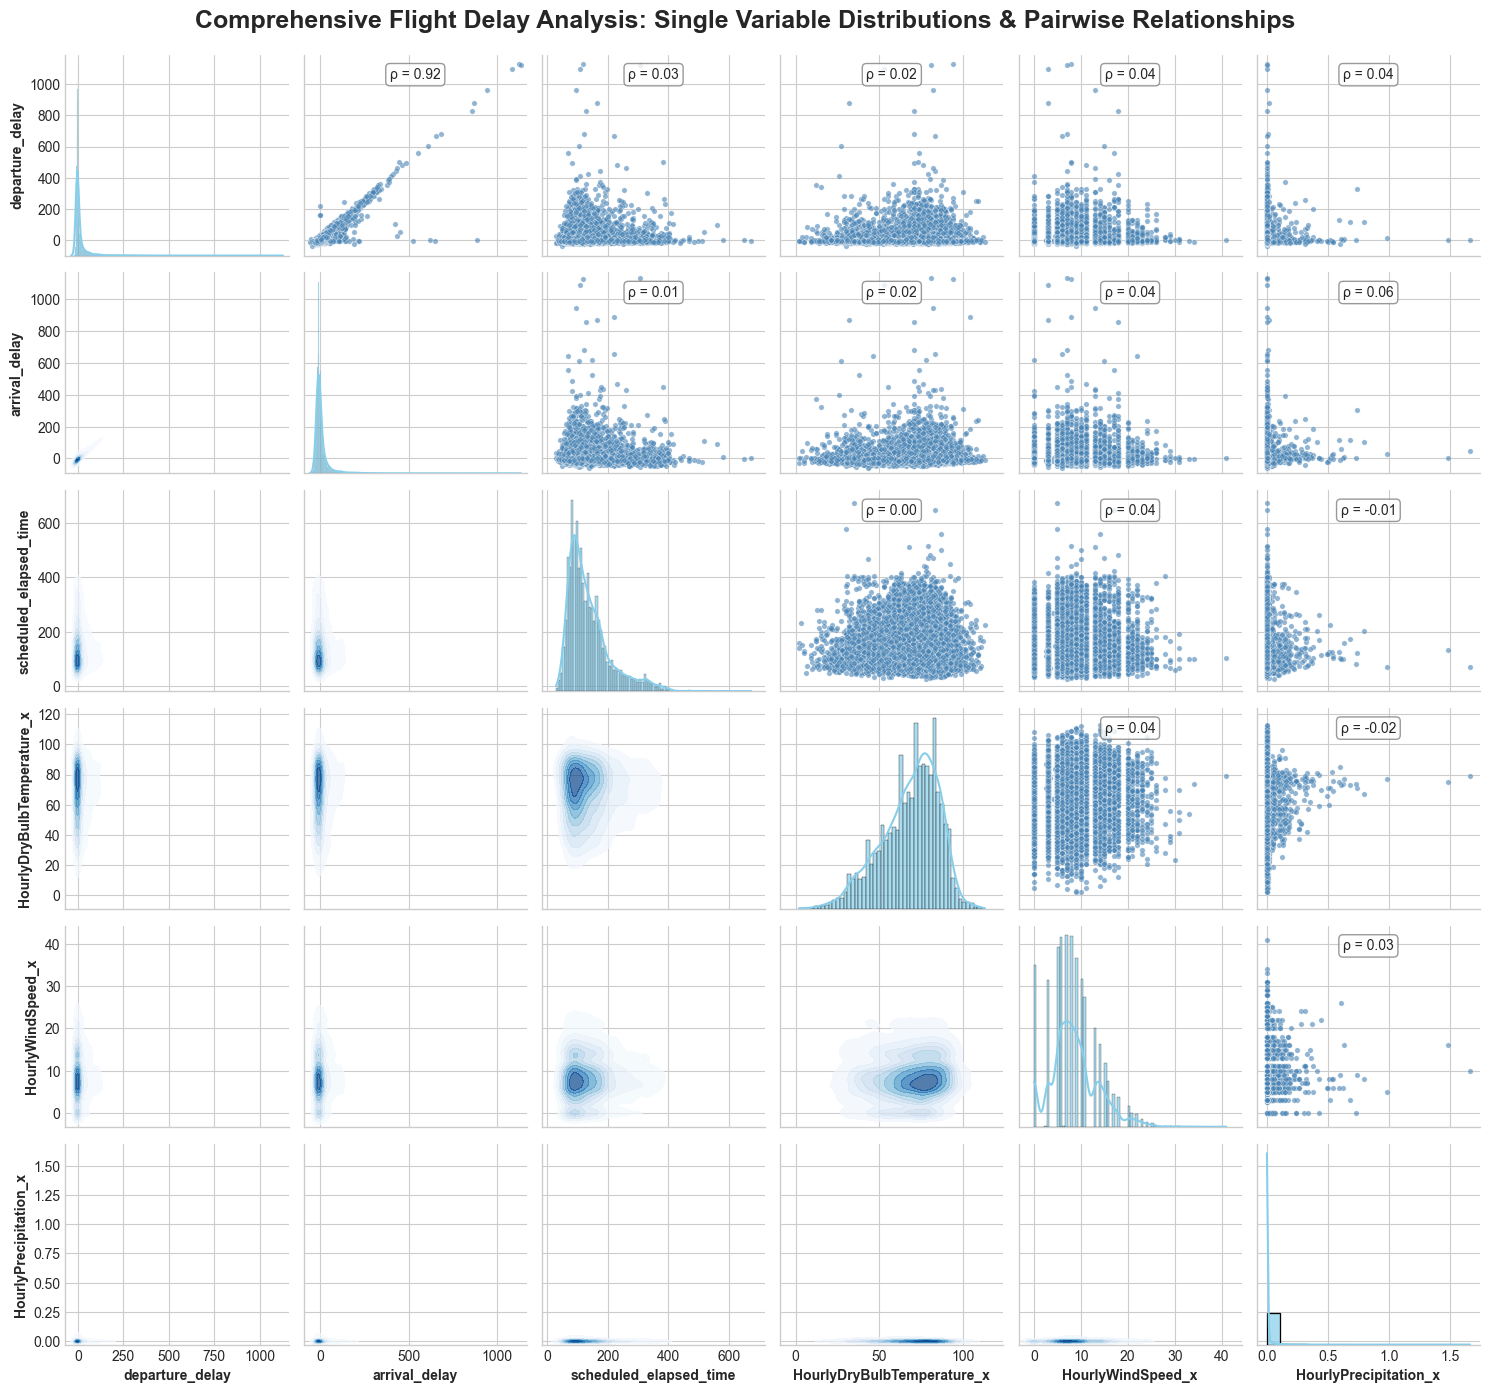

STATISTICAL SUMMARY OF KEY VARIABLES
       departure_delay  arrival_delay  scheduled_elapsed_time  \
count     5.512903e+06   5.512903e+06            5.512903e+06   
mean      1.098301e+01   6.302835e+00            1.377521e+02   
std       4.941041e+01   5.392080e+01            7.084878e+01   
min      -8.700000e+01  -1.200000e+02           -1.430000e+02   
25%      -5.000000e+00  -1.500000e+01            8.700000e+01   
50%      -2.000000e+00  -6.000000e+00            1.190000e+02   
75%       6.000000e+00   7.000000e+00            1.660000e+02   
max       2.976000e+03   2.973000e+03            1.509000e+03   

       HourlyDryBulbTemperature_x  HourlyWindSpeed_x  HourlyPrecipitation_x  
count                5.510815e+06       5.510815e+06           5.502874e+06  
mean                 6.804055e+01       8.580121e+00           6.333763e-03  
std                  1.733158e+01       5.684680e+00           4.714475e-02  
min                  0.000000e+00       0.000000e+00           0.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import gaussian_kde

# Set style for better visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Create the combined visualization
fig = plt.figure(figsize=(20, 16))

# Define the grid layout
gs = fig.add_gridspec(3, 4)



# 1.1 Departure Delay Distribution with KDE
ax1 = fig.add_subplot(gs[0, 0])
delay_data = merged_df['departure_delay'].clip(-60, 180)
sns.histplot(delay_data, kde=True, ax=ax1, stat='density', alpha=0.7, color='skyblue')
ax1.set_title('A) Departure Delay Distribution with KDE', fontweight='bold', fontsize=12)
ax1.set_xlabel('Departure Delay (minutes)')
ax1.set_ylabel('Density')

# Add statistical annotations
mean_delay = delay_data.mean()
median_delay = delay_data.median()
ax1.axvline(mean_delay, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_delay:.1f}')
ax1.axvline(median_delay, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_delay:.1f}')
ax1.legend()

# 1.2 Q-Q Plot for Normality Test
ax2 = fig.add_subplot(gs[0, 1])
stats.probplot(merged_df['departure_delay'].clip(-50, 100), dist="norm", plot=ax2)
ax2.set_title('B) Q-Q Plot: Normality Test\nfor Departure Delays', fontweight='bold', fontsize=12)

# 1.3 Box Plot by Carrier
ax3 = fig.add_subplot(gs[0, 2])
top_10_carriers = merged_df['carrier_code'].value_counts().head(10).index
carrier_delay_data = merged_df[merged_df['carrier_code'].isin(top_10_carriers)]
sns.boxplot(data=carrier_delay_data, x='carrier_code', y='departure_delay', 
           showfliers=False, ax=ax3)
ax3.set_title('C) Departure Delay Distribution\nby Carrier (Top 10)', fontweight='bold', fontsize=12)
ax3.set_xlabel('Carrier Code')
ax3.set_ylabel('Departure Delay (minutes)')
ax3.tick_params(axis='x', rotation=45)

# 1.4 Cumulative Distribution Function
ax4 = fig.add_subplot(gs[0, 3])
sorted_delays = np.sort(merged_df['departure_delay'].clip(-60, 120))
cdf = np.arange(1, len(sorted_delays)+1) / len(sorted_delays)
ax4.plot(sorted_delays, cdf, linewidth=2, color='purple')
ax4.set_title('D) Cumulative Distribution Function\nof Departure Delays', fontweight='bold', fontsize=12)
ax4.set_xlabel('Departure Delay (minutes)')
ax4.set_ylabel('Cumulative Probability')
ax4.grid(alpha=0.3)
ax4.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='On Time')
ax4.axhline(y=0.5, color='orange', linestyle='--', alpha=0.7, label='Median')
ax4.legend()



# Select key variables for pairwise analysis
key_variables = ['departure_delay', 'arrival_delay', 'scheduled_elapsed_time', 
                'HourlyDryBulbTemperature_x', 'HourlyWindSpeed_x', 'HourlyPrecipitation_x']

# Sample data for better visualization performance
sample_size = min(10000, len(merged_df))
plot_sample = merged_df[key_variables].sample(n=sample_size, random_state=42)

# Create PairGrid for pairwise relationships
ax_big = fig.add_subplot(gs[1:3, :])
ax_big.set_visible(False)  # Hide this axis, we'll use it for the pairplot

# Create a separate figure for pairplot and then copy it
pairplot_fig = plt.figure(figsize=(18, 14))
g = sns.PairGrid(plot_sample, diag_sharey=False, corner=False)
g.map_upper(sns.scatterplot, alpha=0.6, s=15, color='steelblue')
g.map_lower(sns.kdeplot, fill=True, cmap='Blues', alpha=0.7)
g.map_diag(sns.histplot, kde=True, color='skyblue', alpha=0.7)

# Add correlation coefficients to upper triangle
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    x_var = key_variables[j]
    y_var = key_variables[i]
    corr_coef = plot_sample[[x_var, y_var]].corr().iloc[0,1]
    g.axes[i, j].annotate(f'ρ = {corr_coef:.2f}', 
                         xy=(0.5, 0.9), xycoords='axes fraction',
                         ha='center', va='center',
                         bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Customize pairplot
for i in range(len(key_variables)):
    for j in range(len(key_variables)):
        if i != j:
            # Remove axis labels from inner plots for clarity
            g.axes[i, j].set_xlabel('')
            g.axes[i, j].set_ylabel('')
        if i == len(key_variables)-1:
            g.axes[i, j].set_xlabel(key_variables[j], fontweight='bold')
        if j == 0:
            g.axes[i, j].set_ylabel(key_variables[i], fontweight='bold')

plt.suptitle('E) Pairwise Variable Relationships Analysis\n(Sample: 10,000 flights)', 
             fontsize=16, fontweight='bold', y=1.02)

# Save the pairplot to a buffer and close it
from io import BytesIO
buf = BytesIO()
pairplot_fig.savefig(buf, format='png', dpi=100, bbox_inches='tight')
buf.seek(0)

# Display the pairplot image in our main figure
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
img = plt.imread(buf)
imagebox = OffsetImage(img, zoom=0.38)
ab = AnnotationBbox(imagebox, (0.5, 0.25), xycoords='figure fraction', 
                   boxcoords="figure fraction", frameon=False)
fig.add_artist(ab)

plt.close(pairplot_fig)  # Close the temporary figure


plt.suptitle('Comprehensive Flight Delay Analysis: Single Variable Distributions & Pairwise Relationships', 
             fontsize=18, fontweight='bold', y=0.95)

# Add explanatory text
fig.text(0.02, 0.02, 
         f'Dataset: {len(merged_df):,} flights | '
         f'Average Departure Delay: {merged_df["departure_delay"].mean():.1f} min | '
         f'Average Arrival Delay: {merged_df["arrival_delay"].mean():.1f} min | '
         f'On-time Rate: {(merged_df["departure_delay"] <= 0).mean()*100:.1f}%',
         fontsize=10, style='italic', bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray"))

plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.06)
plt.show()



print("="*70)
print("STATISTICAL SUMMARY OF KEY VARIABLES")
print("="*70)

summary_stats = merged_df[key_variables].describe()
print(summary_stats)

print("\n" + "="*70)
print("CORRELATION MATRIX")
print("="*70)
correlation_matrix = merged_df[key_variables].corr()
print(correlation_matrix.round(3))

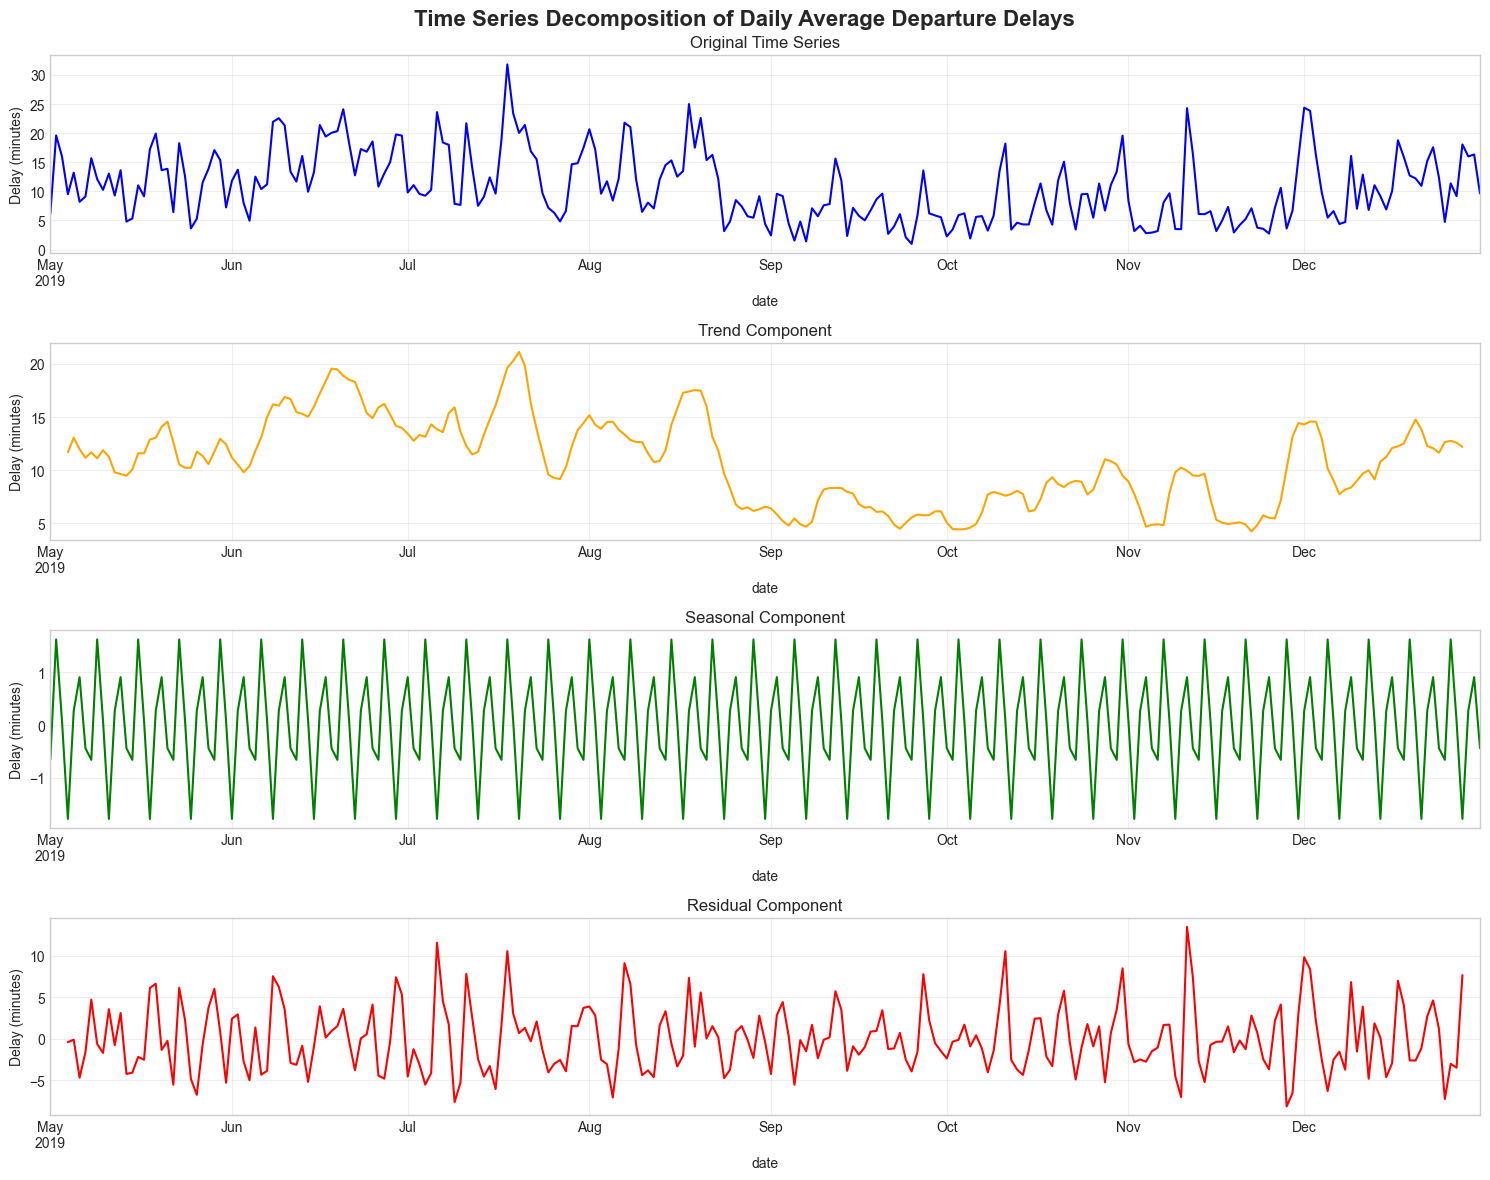

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Create daily time series
daily_ts = merged_df.groupby('date').agg({
    'departure_delay': 'mean',
    'flight_number': 'count'
}).reset_index()

daily_ts['date'] = pd.to_datetime(daily_ts['date'])
daily_ts = daily_ts.set_index('date')
daily_ts = daily_ts.asfreq('D')

# Fill missing values
daily_ts['departure_delay'] = daily_ts['departure_delay'].interpolate()

# Decompose time series (using multiplicative model for better seasonality)
decomposition = seasonal_decompose(daily_ts['departure_delay'], 
                                  model='additive', period=7)

fig, axes = plt.subplots(4, 1, figsize=(15, 12))
decomposition.observed.plot(ax=axes[0], title='Original Time Series', color='blue')
decomposition.trend.plot(ax=axes[1], title='Trend Component', color='orange')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal Component', color='green')
decomposition.resid.plot(ax=axes[3], title='Residual Component', color='red')

for ax in axes:
    ax.set_ylabel('Delay (minutes)')
    ax.grid(alpha=0.3)

plt.suptitle('Time Series Decomposition of Daily Average Departure Delays', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

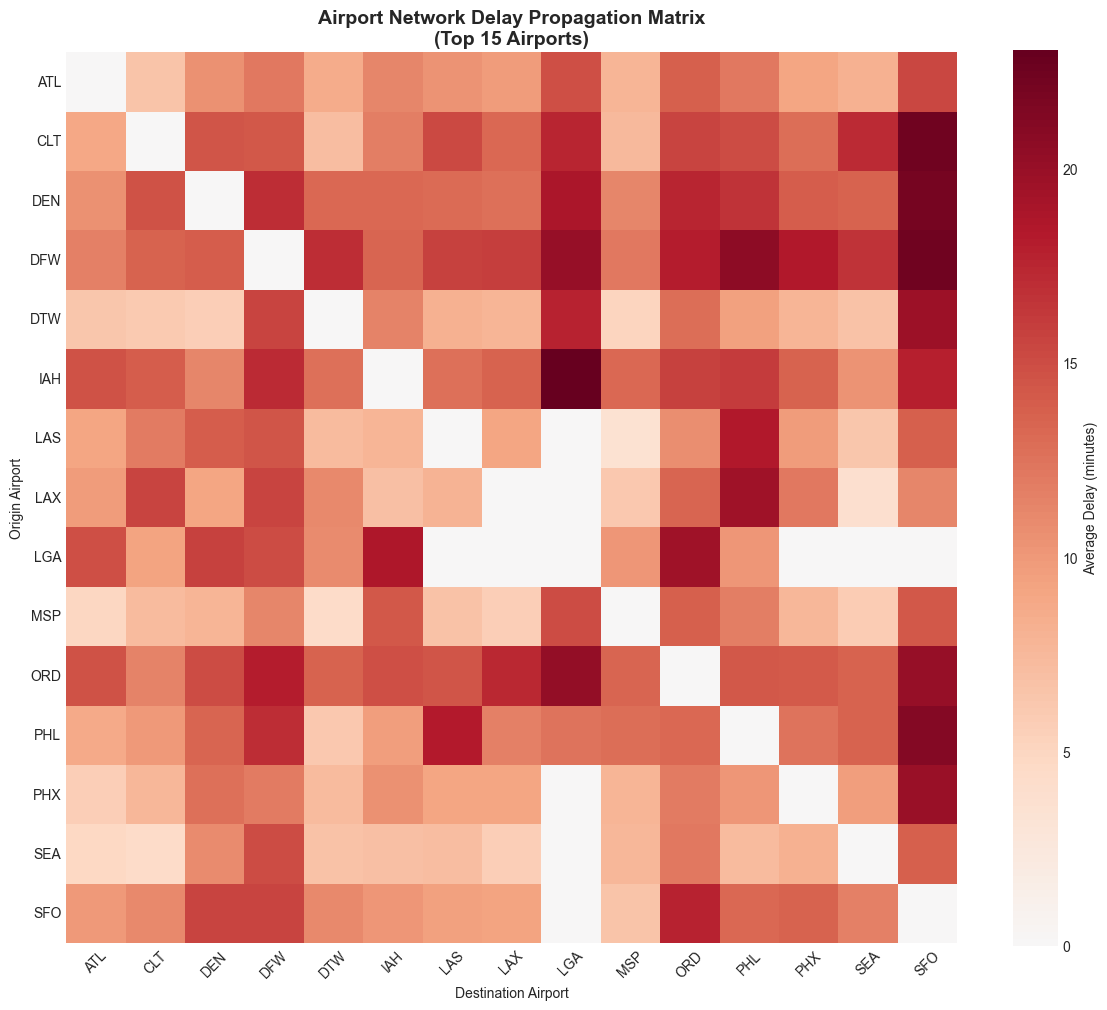

DATASET SUMMARY STATISTICS
Total Flights: 5,512,903
Date Range: 2019-05-01 to 2019-12-31
Average Departure Delay: 10.98 minutes
Average Arrival Delay: 6.30 minutes
On-time Departure Rate: 66.2%
Cancellation Rate: 100.00%
Number of Unique Carriers: 10
Number of Unique Airports: 373


In [22]:
# Prepare data for chord diagram (showing delay propagation between airports)
top_airports = merged_df['origin_airport'].value_counts().head(15).index
airport_network = merged_df[merged_df['origin_airport'].isin(top_airports) & 
                           merged_df['destination_airport'].isin(top_airports)]

airport_delay_flow = airport_network.groupby(['origin_airport', 'destination_airport']).agg({
    'departure_delay': 'mean',
    'flight_number': 'count'
}).reset_index()

# Create matrix for chord diagram
delay_matrix = airport_delay_flow.pivot(index='origin_airport', 
                                      columns='destination_airport', 
                                      values='departure_delay').fillna(0)

plt.figure(figsize=(12, 10))
sns.heatmap(delay_matrix, cmap='RdBu_r', center=0, 
           cbar_kws={'label': 'Average Delay (minutes)'},
           square=True)
plt.title('Airport Network Delay Propagation Matrix\n(Top 15 Airports)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Destination Airport')
plt.ylabel('Origin Airport')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print summary statistics
print("="*50)
print("DATASET SUMMARY STATISTICS")
print("="*50)
print(f"Total Flights: {len(merged_df):,}")
print(f"Date Range: {merged_df['date'].min()} to {merged_df['date'].max()}")
print(f"Average Departure Delay: {merged_df['departure_delay'].mean():.2f} minutes")
print(f"Average Arrival Delay: {merged_df['arrival_delay'].mean():.2f} minutes")
print(f"On-time Departure Rate: {(merged_df['departure_delay'] <= 0).mean()*100:.1f}%")
print(f"Cancellation Rate: {(merged_df['cancelled_code'] != '0').mean()*100:.2f}%")
print(f"Number of Unique Carriers: {merged_df['carrier_code'].nunique()}")
print(f"Number of Unique Airports: {merged_df['origin_airport'].nunique()}")